# Практическая работа №3: Регрессионный анализ. Вариант 15

Выполнил студент гр. 1374 Мухамедрахимов Тимур

##Цель работы

Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Постановка задачи

Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

1. Регрессионная модель здается соотношением:

$\mathbb{E}(Y|z) = X^{T}\beta$

$Y$ - вектор $n \times 1$ наблюдений

$z$ - соответствующие значения ковариат, определяющие $m \times n$ матрицу регрессоров $X = X(z)$

$\beta - (m \times 1)$ вектор параметров модели

Альтернативная форма записи модели:

$Y = X^{T}\beta + ϵ$

$ϵ - (n \times 1) - вектор ошибок, \mathbb{E}ϵ = 0$

\\

2. Метод наименьших квадратов:

$RSS(\beta) = ||Y - X^{T}\beta||^{2} =  (Y - X^{T}\beta)^{T}(Y - X^{T}\beta) → min$

Нормальные уравнения:
XX^{T}\beta = XY

Решение в регулярном случае:

$\beta = (XX^{T})^{-1}XY$

Оценка параметра $σ^{2}$:

$s^{2} = SS_{e}/(n-r) = RSS(\hat\beta)/(n-r)$

где $r = rank(X)$

\\

3. ДНО-функция:

$\psi(\beta) = C^{T}\beta$

\\

4. Доверительоне оценивание:

Классическое предположение:

$Y \sim N(X^{T}\beta, \sigma^{2}E)$

$\epsilon \sim N(0, \sigma^{2}E)$

Доверительный элипсоид уровня доверия 1 - $\alpha$ параметра &\psi&:

$[A_{\alpha} = \{\bar x: (\bar x - \hat \psi)^{T} B^{-1} (\bar x - \hat \psi)\le qs^{2}x_{\alpha} \}]$

где $x_{\alpha}: F_{q, n-r}(x_{\alpha}) = 1 - \alpha$

Доверительный интервал уровня доверия 1 - $\alpha$:

$[\hat\psi - x_{\alpha}s\sqrt b,\hat\psi + x_{\alpha}s\sqrt b] \ni \hat\psi$

где $x_{\alpha}: S_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

\\

5. Проверка гипотез:

$H_{0}: \psi = 0$

$\mathbb{F}$ - статистика:

$\mathbb{F} = \frac{SS_{H}/q}{SS_{e}/(n-r)}$

где:

$SS_{H} = RSS(\hat\beta_{H}) - RSS(\hat\beta)$

$SS_{H} = RSS(\hat\beta)$

Граница критической области:

$x_{\alpha}: F_{q, n-r}(x_{\alpha}) = 1-\alpha$

$p-value = 1 - F_{q, n-r}(\mathbb{F})$

## Выполнение работы

###1. График результатов эксперимента. Линейная модель переменной Y относительно переменной X. МНК оценки параметров $β_{0}$ и $β_{1}$. Построение линии регрессии.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from IPython.display import Markdown as md
import scipy.stats as sps
import scipy
import sympy
import random

In [ ]:
Y = '13.12 16.58 13.15 9.80 8.98 17.31 20.60 17.22 7.46 12.59 13.50 13.11 16.93 12.69 17.53 10.82 10.76 14.25 13.52 15.47 10.21 23.26 15.66 14.89 12.16 9.77 9.71 18.13 13.98 17.37 16.83 18.70 15.10 10.21 17.45 15.46 17.10 16.41 8.34 17.54 15.09 15.84 12.93 12.30 15.87 15.98 12.53 11.56 13.28 17.78'
X = '0 1 8 4 5 2 4 6 6 0 3 1 5 4 0 8 1 6 5 6 3 3 1 8 5 7 3 5 1 1 4 6 3 3 2 1 5 4 0 3 4 3 4 2 6 4 1 0 3 1'

In [ ]:
X = np.array(X.split()).astype(float)
Y = np.array(Y.split()).astype(float)

In [ ]:
df = pd.DataFrame({'X':X, 'Y':Y})

Табличные данные:

In [ ]:
df

,X,Y
0,0.0,13.12
1,1.0,16.58
2,8.0,13.15
3,4.0,9.80
4,5.0,8.98
5,2.0,17.31
6,4.0,20.60
7,6.0,17.22
8,6.0,7.46
9,0.0,12.59


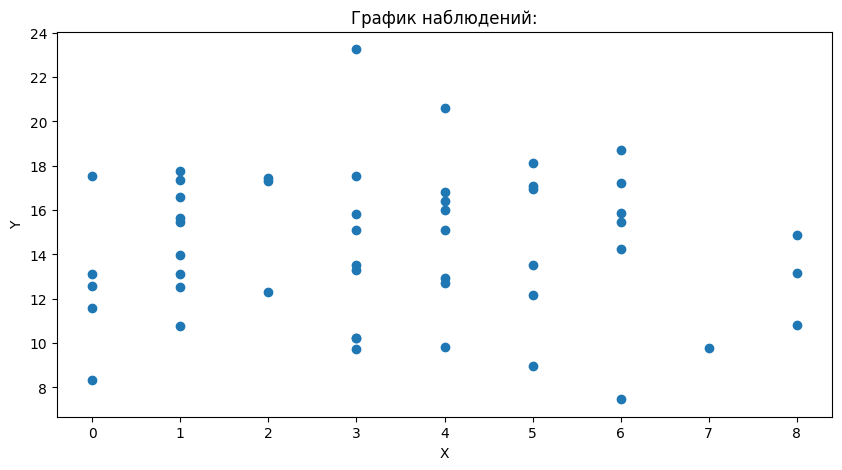

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(X,Y)
plt.title('График наблюдений:')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Линейная модель Y относительно X имеет вид:

$ Y = X^{T}\beta + ϵ$

Оценка вектора параметров $\beta$ по МНК:

$\beta = (XX^{T})^{-1}XY$

In [ ]:
X_bias = np.insert(X.reshape(50, -1), 0, 1, axis = 1)#добавление свободного члена в матрицу Х

In [ ]:
beta = (inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(Y))

In [ ]:
print(beta.reshape(2,1))

[[14.46880799]
 [-0.03865731]]


Оценки параметров $\beta_{0}$ и $\beta_{1}$:

In [ ]:
beta_1 = beta[1]
beta_0 = beta[0]

In [ ]:
beta_0, beta_1

(14.468807994289802, -0.038657308271869945)

$\hat\beta_{0} = 14.46880799$

$\hat\beta_{1} = -0.03865731$:


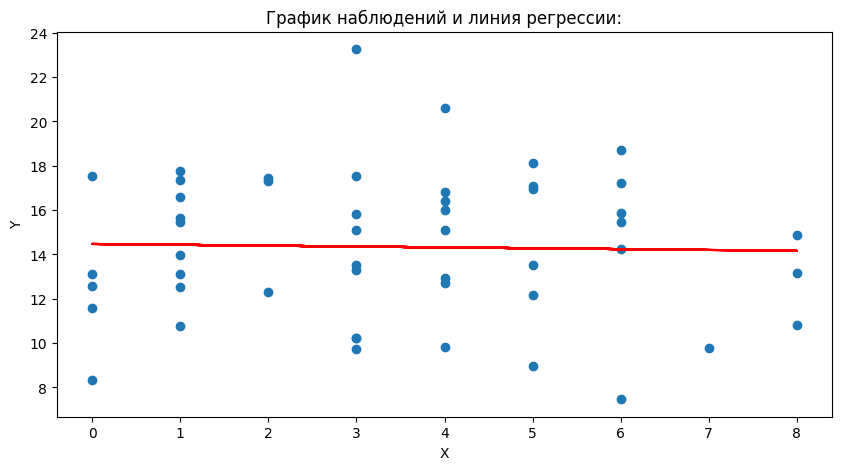

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(X,Y)
plt.plot(X, X * beta_1 + beta_0, c = 'r')
plt.title('График наблюдений и линия регрессии:')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Линия регрессии имеет небольшой коэффициент наклона, и это говорит о том, что зависимость очень близка к константной.

###2. Построение несмещенной оценки дисперсии. Построение гистограммы на базе ошибок. Проверка гипотезы нормальности ошибок на уровне значимости $α$ по $χ^{2}$. Оценка расстояния полученной оценки до класса нормальных распределений по Колмогорову.

In [ ]:
np.linalg.matrix_rank(X_bias)#ранг матрицы X

2

In [ ]:
beta = np.array([beta_0, beta_1])#вектор оценок параметров регрессии

In [ ]:
beta

array([14.46880799, -0.03865731])

In [ ]:
Y = np.array(Y)
beta = np.array([beta_0, beta_1])
def RSS(beta):
    return (Y - X_bias.dot(beta)).T.dot(Y - X_bias.dot(beta))


var_est = RSS(beta)/48
print('Несмещенная оценка дисперсии:', var_est)

Несмещенная оценка дисперсии: 11.0804097367621


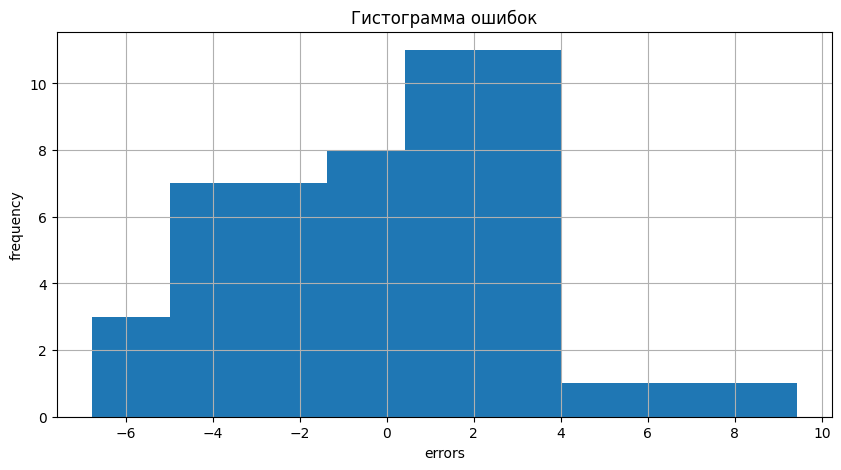

In [ ]:
h = 1.8
errors = Y - X_bias.dot(beta)
bins = np.arange(errors.min(), errors.max() + h, h)
plt.figure(figsize = (10,5))
plt.hist(errors, bins = bins)
plt.xlabel('errors')
plt.ylabel('frequency')
plt.title('Гистограмма ошибок')
plt.grid()
plt.show()

Проверка гипотезы нормальности ошибок:

$X_1, X_2, \dots, X_n \sim \mathbb{p_{\theta}(x)}$.

$H_0 : p \equiv N(0,s^{2})$

$H_A : \exists x : \mathbb{p_{\theta}(x)} \neq p_{N(0,s^{2})}(x)$


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
n = 50
alpha =  0.05
borders = np.arange(-10, 10, 4)
errors.sort()

In [ ]:
borders

array([-10,  -6,  -2,   2,   6])

In [ ]:
#абсолютные частоты
v = []
for i in range(1,len(borders)):
    v.append(np.sum((errors < borders[i]) & (errors >= borders[i-1])))
v.append(np.sum(errors >= borders[-1] ))
v = np.array(v)

In [ ]:
#теоретические частоты
p = []
for i in range(1,len(borders)):
    p.append(sps.norm(0,np.sqrt(var_est)).cdf(borders[i]) - sps.norm(0,np.sqrt(var_est)).cdf(borders[i - 1]))
p.append(1 - sps.norm(0,np.sqrt(var_est)).cdf(borders[-1]))
p = np.array(p)

In [ ]:
intervals = ['[-10,-6)', '[-6,-2)', '[-2, 2)','[2,6)', '[6, +inf)']

Таблица абсолютных и относительных частот:

In [ ]:
pd.DataFrame({'interval':intervals, 'absolute frequences':v, 'theoretical frequences':np.array(p) * n})

,interval,absolute frequences,theoretical frequences
0,"[-10,-6)",2,1.720121
1,"[-6,-2)",11,11.912119
2,"[-2, 2)",21,22.602361
3,"[2,6)",14,11.912119
4,"[6, +inf)",2,1.786701


Рассчет статистики $𝜒^{2}$:

In [ ]:
np.sum(np.square(v - n * p)/(n * p))

0.6203921691975429

Рассчет критического значения на уровне значимости $\alpha$:

In [ ]:
sps.chi2.ppf(1 - alpha, df = len(v)- 1)

9.487729036781154

$\chi^2 \approx 0.78281$

$x_{\alpha} \approx 9.48$

$\chi^2 < x_{\alpha_2}$

Статистика $𝜒^{2}$ в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ не отвергается.

Рассчет статистики Колмогорова:

In [ ]:
D, _  = sps.kstest(errors, 'norm', args = [0, np.sqrt(var_est)])
eta = np.sqrt(n) * D
eta

0.6140923034366375

Рассчет критического значения на уровне значимости 1 - $\alpha$

In [ ]:
sps.kstwobign.ppf(1 - alpha)

1.3580986393225505

Статистика Колмогорова оказалась в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ не отвергается.

###3. Построение доверительных интервалов в предполложении нормальности ошибок для параметров $\beta_{0}$ и $\beta_{1}$ уровня доверия $1 - \alpha$. Построение доверительного эллипса уровня доверия $1 - \alpha$ для $(\beta_{0},\beta_{1})$

####Доверительный интервал для $\beta_{0}$:



МНК-оценка: $ψ = C^{T}\hat{\beta}$

In [ ]:
C = np.array([1, 0])

In [ ]:
psi_est = C.T.dot(beta)

In [ ]:
X = np.array(X)
X = X.reshape(50, 1)

In [ ]:
X_matrix = np.concatenate([np.ones(n).reshape(n,1), X], axis = 1)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [ ]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.06638115631691649

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [ ]:
x_alpha = sps.t(df = n - 2).ppf(1- alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [ ]:
left = psi_est - x_alpha * np.sqrt(var_est) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(var_est) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[12.744425910135595, 16.19319007844401]


[12.744425910135595, 16.19319007844401] $\ni \hat{\psi_{\beta_{0}}}$




#### Доверительный интервал для $\beta_{1}$:

In [ ]:
C = np.array([0, 1])

In [ ]:
psi_est = C.T.dot(beta)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [ ]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.003965421524308034

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [ ]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [ ]:
left = psi_est - x_alpha * np.sqrt(var_est) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(var_est) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[-0.46011673799807484, 0.382802121454335]


[-0.46011673799807484, 0.382802121454335]$\ni \hat{\psi_{\beta_{1}}}$



####Построение доверительного эллипса:

In [ ]:
C = np.array([[1, 0],[0, 1]])
psi_est = C.T.dot(beta)

B = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)

In [ ]:
x_symbol = sympy.Symbol('x')
y_symbol = sympy.Symbol('y')
x_vec = np.matrix([[x_symbol], [y_symbol]])
expr = (x_vec - psi_est).T * inv(B) * (x_vec - psi_est)
print(f"Неравенство эллипса: {expr[0,0].as_poly().as_expr()} <= {2 * var_est * sps.f(2, n - 2).ppf(1 - alpha)}")

Неравенство эллипса: 50.0*x**2 + 342.0*x*y - 6395.21313347609*x + 837.0*y**2 - 29169.1169164882*y + 257286.731469242 <= 70.70913248075027


Определение функция для построения эллипса:

In [ ]:
def f(x,y):
    return 50.0*x**2 + 342.0*x*y - 6158.19572067261*x + 837.0*y**2 - 28088.0601196289*y + 238569.169869688 - 2 * var_est * sps.f(2, n - 2).ppf(1 - alpha)

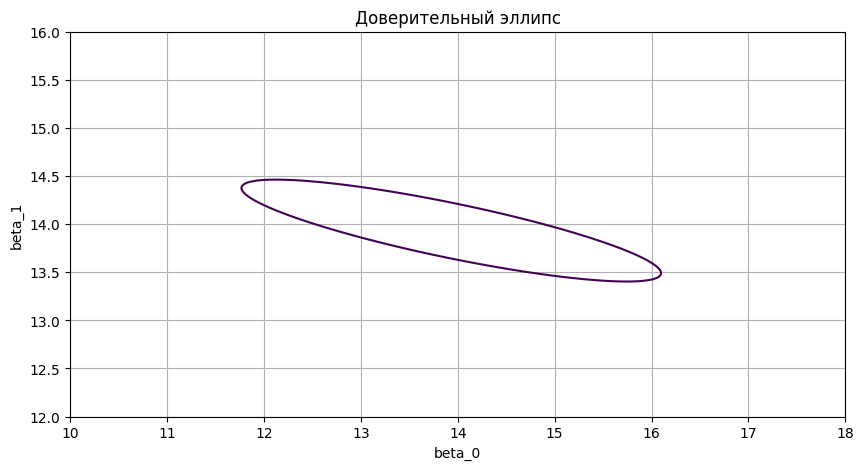

In [ ]:
x_lin = np.linspace(10, 18, 200)
y_lin = np.linspace(12, 16, 200)

x_lin, y_lin = np.meshgrid(x_lin, y_lin)

z = f(x_lin, y_lin)

fig, ax = plt.subplots(figsize = (10,5))
ax.contour(x_lin,y_lin,z, [0])
plt.title('Доверительный эллипс')
plt.xlabel('beta_0')
plt.ylabel('beta_1')
plt.grid()

Рассчет полуосей:

In [ ]:
cov = inv(B)
eigenvalues, _ = np.linalg.eig(cov)
np.sqrt(1/eigenvalues * (alpha * 2 * var_est))

array([0.27690612, 0.03563551])

Первая полуось $≈$ 0.27690612

Вторая полуось $≈$ 0.03563551

###4. Сформулировать гипотезу независимости Y от X. Провести проверку значимости.

$H_{0}: \beta_{1} = 0$

$H_{A}: \beta_{1} \not= 0$


Рассчет F - статистики:

In [ ]:
beta_H0 = np.array([beta[0], 0])

In [ ]:
F = (RSS(beta_H0) - RSS(beta)) * (n - 2)/2/RSS(beta)

In [ ]:
print(f'F-статистика равна {F}')

F-статистика равна 0.056442060936424426


In [ ]:
print('Граница критической области:', sps.f(2, n-2).ppf(1-alpha))

Граница критической области: 3.1907273359284987


In [ ]:
print('p-value:', 1 - sps.f(2, n -2).cdf(F))

p-value: 0.9451838728901419


F-статистика попала в доверительный интервал. Гипотеза $H_{0}$ не отвергается.

###5. Сформулировать можель, включающую дполнительный член с X^{2}. Построить МНК оценки параметров $\beta_{0}, \beta_{1}, \beta_{2}$ в данной модели. Изобразить графически полученную регрессионную зависимость.

In [ ]:
X_matrix = np.concatenate([np.ones(n).reshape(50,1), X.reshape(50,1), (X**2).reshape(50,1)], axis = 1)

In [ ]:
beta = (inv(X_matrix.T.dot(X_matrix)).dot(X_matrix.T).dot(Y))

beta_0 = beta[0]
beta_1 = beta[1]
beta_2 = beta[2]

МНК-оценка параметров $\beta_{0}, \beta_{1}, \beta_{2}:$

In [ ]:
print('beta_0:', beta_0)
print('beta_1:', beta_1)
print('beta_2:', beta_2)

beta_0: 13.412874542644055
beta_1: 0.8886746463441008
beta_2: -0.12637645359264973


In [ ]:
X = np.array(X).reshape(50,1).astype(int)
Y_est = (X**2 * beta_2 + X * beta_1 + beta_0).reshape(50,1)

In [ ]:
coords = np.concatenate([X, Y_est], axis = 1)
sorted_coords = coords[np.argsort(coords[:,0])]

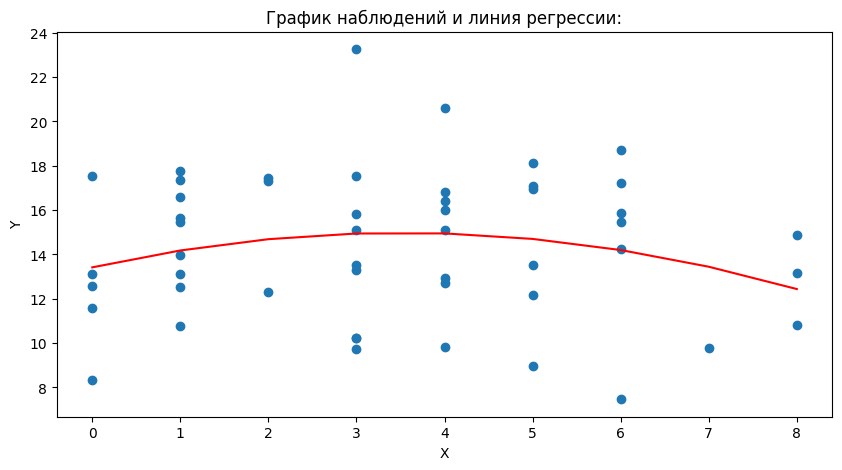

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(X,Y)
plt.plot(sorted_coords[:, 0],sorted_coords[:, 1], c = 'r')
plt.title('График наблюдений и линия регрессии:')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

###6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок.

In [ ]:
Y = np.array(Y)
X = np.array(X)

X_matrix = np.concatenate([np.ones(n).reshape(50,1), X.reshape(50,1), (X**2).reshape(50,1)], axis = 1)
beta = np.array([beta_0, beta_1, beta_2])

def RSS(beta):
    return (Y - X_matrix.dot(beta)).T.dot(Y - X_matrix.dot(beta))

var_est = RSS(beta)/48
print('Несмещенная оценка дисперсии:', var_est)

Несмещенная оценка дисперсии: 10.594886152994636


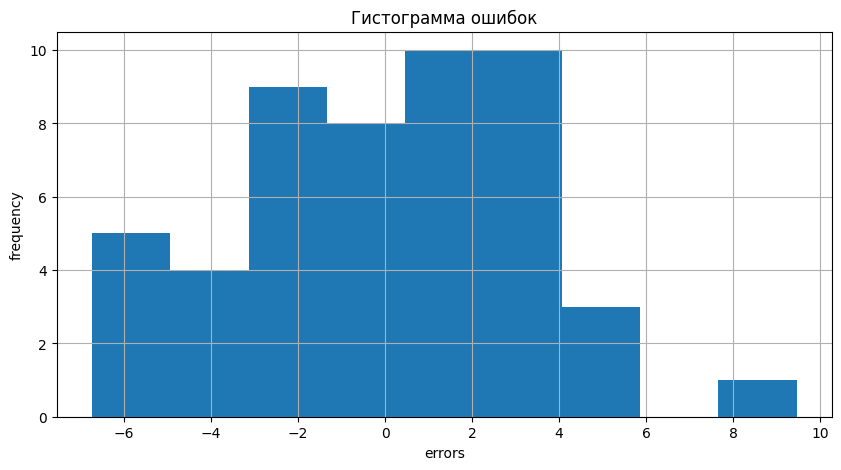

In [ ]:
h = 1.8
errors = Y - X_matrix.dot(beta)
bins = np.arange(errors.min(), errors.max() + h, h)
plt.figure(figsize = (10,5))
plt.hist(errors, bins = bins)
plt.xlabel('errors')
plt.ylabel('frequency')
plt.title('Гистограмма ошибок')
plt.grid()
plt.show()

$X_1, X_2, \dots, X_n \sim \mathbb{p_{\theta}(x)}$.

$H_0 : p \equiv N(\bar{X},s^{2})$

$H_A : \exists x : \mathbb{p_{\theta}(x)} \neq p_{N(\bar{X},s^{2})}(x)$

 Оценка параметра - ОМП: $\hat{\theta} = (\bar{X},s^{2})$

In [ ]:
n = 50
alpha =  0.05
borders = np.arange(-8, 6, 2)
errors.sort()

In [ ]:
borders

array([-8, -6, -4, -2,  0,  2,  4])

In [ ]:
mu = np.mean(errors)
s_2 = (1/n)*(np.sum((errors - mu)**2))
mu, s_2

(7.752021247142693e-14, 10.171090706874848)

In [ ]:
#абсолютные частоты
v = []
for i in range(1,len(borders)):
    v.append(np.sum((errors < borders[i]) & (errors >= borders[i-1])))
v.append(np.sum(errors >= borders[-1] ))
v = np.array(v)

In [ ]:
#теоретические частоты
p = []
for i in range(1,len(borders)):
    p.append(sps.norm(0,np.sqrt(var_est)).cdf(borders[i]) - sps.norm(0,np.sqrt(var_est)).cdf(borders[i - 1]))
p.append(1 - sps.norm(0,np.sqrt(var_est)).cdf(borders[-1]))
p = np.array(p)

In [ ]:
intervals = ['[-8,-6)', '[-6,-4)', '[-4, -2)','[-2,0)', '[0, 2)', '[2, 4)', '[4, +inf)']

In [ ]:
pd.DataFrame({'interval':intervals, 'absolute frequences':v, 'theoretical frequences':p * n})

,interval,absolute frequences,theoretical frequences
0,"[-8,-6)",1,1.282518
1,"[-6,-4)",6,3.845836
2,"[-4, -2)",6,7.995203
3,"[-2,0)",10,11.526940
4,"[0, 2)",12,11.526940
5,"[2, 4)",11,7.995203
6,"[4, +inf)",4,5.477857


Рассчет статистики $𝜒^{2}$:

In [ ]:
np.sum(np.square(v - n * p)/(n * p))

3.516414715941767

Рассчет критического значения на уровне значимости $\alpha$

In [ ]:
sps.chi2.ppf(1 - alpha, df = len(v)- 1)

12.591587243743977

$\chi^2 \approx 7.4953635014996370.78281$

$x_{\alpha} \approx 12.591587243743977$

$\chi^2 < x_{\alpha_2}$

Статистика $𝜒^{2}$ в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ не отвергается.

Рассчет статистики колмогорова:

In [ ]:
D, _  = sps.kstest(errors, 'norm', args = [0, np.sqrt(var_est)])
eta = np.sqrt(n) * D
eta

0.5113857427805584

Рассчет критического значения на уровне значимости 1 - $\alpha$

In [ ]:
sps.kstwobign.ppf(1 - alpha)

1.3580986393225505

Статистика Колмогорова оказалась в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ не отвергается.

###7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_{0}, \beta_{1}, \beta_{2}$ уровня доверия 1 -$\alpha$. Написать уравнение доверительного эллимсоида уровня доверия 1 - $\alpha.$

####Доверительный интервал для $\beta_{0}$:



In [ ]:
beta = [beta_0, beta_1, beta_2]

In [ ]:
C = np.array([1,0, 0])

In [ ]:
psi_est = C.T.dot(beta)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [ ]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.11422450057719775

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [ ]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [ ]:
left = psi_est - x_alpha * np.sqrt(var_est) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(var_est) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[11.200997574729309, 15.6247515105588]


[11.200997574729309, 15.6247515105588] $\ni \hat{\psi_{\beta_{0}}}$

#### Доверительный интервал для $\beta_{1}$:

In [ ]:
C = np.array([0, 1, 0])

In [ ]:
psi_est = C.T.dot(beta)

In [ ]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.04086478571941016

In [ ]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [ ]:
left = psi_est - x_alpha * np.sqrt(var_est) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(var_est) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[-0.4343134768357858, 2.211662769523987]


[-0.4343134768357858, 2.211662769523987]$\ni \hat{\psi_{\beta_{1}}}$




#### Доверительный интервал для $\beta_{2}$:

In [ ]:
C = np.array([0, 0, 1])

In [ ]:
psi_est = C.T.dot(beta)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [ ]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.0006853000450018588

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [ ]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [ ]:
left = psi_est - x_alpha * np.sqrt(var_est) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(var_est) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[-0.2977018370846519, 0.044948929899352424]


[-0.2977018370846519, 0.044948929899352424]$\ni \hat{\psi_{\beta_{2}}}$





#### Уравнение доверительного эллипсоида:

In [ ]:
C = np.diag(np.full(3,1))
C

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
psi_est = C.T.dot(beta)
B = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)

In [ ]:
x_symbol = sympy.Symbol('x')
y_symbol = sympy.Symbol('y')
z_symbol = sympy.Symbol('z')

x_vec = np.matrix([[x_symbol], [y_symbol], [z_symbol]])
expr = (x_vec - psi_est).T * inv(B) * (x_vec - psi_est)
print(f"Неравенство эллипса: {expr[0,0].as_poly().as_expr()} <= {2 * var_est * sps.f(2, n - 2).ppf(1 - alpha)}")

Неравенство эллипса: 50.0000000000003*x**2 + 342.000000000003*x*y + 1674.00000000001*x*z - 28381.6425322351*x + 837.000000000006*y**2 + 9426.00000000006*y*z - 153470.110516934*y + 29049.0000000002*z**2 - 928144.092601889*z + 7444117.51028687 <= 67.61078573882064


Рассчет полуосей:

In [ ]:
cov = inv(B)
eigenvalues, _ = np.linalg.eig(cov)
np.sqrt(1/eigenvalues * (alpha * 2 * var_est))

array([0.00595866, 0.39130068, 0.10903977])

Первая полуось $≈$ 0.00595

Вторая полуось $≈$ 0.39130

Третья полуось $≈$ 0.10903

###8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от X и проверить ее значимость на уровне $\alpha$

$H_{0}: \bar\beta = (0, \hat\beta_{1}, 0)^{T}$

$H_{A}: \beta_{1} \not= (0, \hat\beta_{1}, 0)^{T}$

Рассчет F - статистики:

In [ ]:
beta_H0 = np.array([0, beta[1], 0])

In [ ]:
F = (RSS(beta_H0) - RSS(beta)) * (n - 2)/2/RSS(beta)

In [ ]:
print(f'F-статистика равна {F}')

F-статистика равна 312.4928466197135


In [ ]:
print('Граница критической области:', sps.f(2, n-2).ppf(1-alpha))

Граница критической области: 3.1907273359284987


In [ ]:
print('p-value:', 1 - sps.f(2, n -2).cdf(F))

p-value: 1.1102230246251565e-16


F-статистика попала далеко за пределы доверительного интервала. Гипотеза $H_{0}$ отвергается.

##Выводы

В ходе данной работы были изучены две модели регрессии: линейная и полиномиальная. Были рассчитаны коэффициенты моделей методом МНК, построены гистограммы ошибок, распределение ошибок было проверено на нормальность тестами Колмогорова и $𝛘^{2}$. Для параметров было проведено доверительное оценивание. Были проверены гипотезы о независимости переменных X и Y, X^2 и Y.